The best result achieved on the public set is a 0.728, with these performances on our test set

In [2]:
res = {'Precision_macro': {'linear_svm': 0.7065520500532003},
 'Recall_macro': {'linear_svm': 0.7024191546603042},
 'f1-macro': {'linear_svm': 0.7040055922626935},
 'f1-micro': {'linear_svm': 0.7135025778241859},
 'Accuracy': {'linear_svm': 0.7135025778241859},
 'Balanced_accuracy': {'linear_svm': 0.7024191546603042},
 'Per_class': {'linear_svm': {'precision': [0.74037657, 0.78137255, 0.86268657, 0.57430168, 0.84334365,
          0.52276423, 0.62101911],
   'recall': 
   [0.7778022 , 0.77341097, 0.79944675, 0.55298548, 0.80830861,
          0.53140496, 0.67357513],
   'f1': [0.75862808, 0.77737137, 0.8298636 , 0.56344204, 0.82545455,
          0.52704918, 0.64623032],
   'support': [4550, 2061, 2169, 1859, 1685, 2420,  579]}},
 'Confusion_matrix': {'linear_svm': [[3539,  100,   44,  191,   31,  592,   53],
         [ 134, 1594,   78,   88,   29,  101,   37],
         [ 132,  114, 1734,   88,    8,   60,   33],
         [ 253,   93,   82, 1028,   92,  271,   40],
         [  93,    9,    3,  110, 1362,  104,    4],
         [ 559,  113,   62,  238,   91, 1286,   71],
         [  70,   17,    7,   47,    2,   46,  390]]},
 'time': {'linear_svm': 366.28341603279114}}

In particular, I want to analyze the f1 score for each class:

   'f1': array([0.75862808, 0.77737137, 0.8298636 , 0.56344204, 0.82545455,
          0.52704918, 0.64623032]),

The most problematic class are 

- 3: 0.5634
- 5: 0.52705
- 6: 0.6462

Let's analyze the confusion matrix

In [8]:
import numpy as np

conf_matr = np.array(res['Confusion_matrix']['linear_svm'])

In [9]:
conf_matr

array([[3539,  100,   44,  191,   31,  592,   53],
       [ 134, 1594,   78,   88,   29,  101,   37],
       [ 132,  114, 1734,   88,    8,   60,   33],
       [ 253,   93,   82, 1028,   92,  271,   40],
       [  93,    9,    3,  110, 1362,  104,    4],
       [ 559,  113,   62,  238,   91, 1286,   71],
       [  70,   17,    7,   47,    2,   46,  390]])

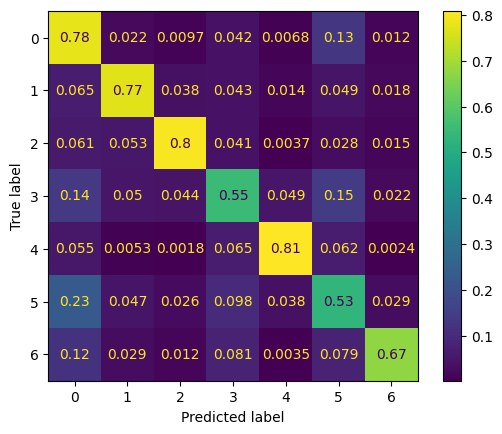

In [12]:
cm_norm = conf_matr / conf_matr.sum(axis=1, keepdims=True)
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm,
                              display_labels=range(0,7))

disp.plot();

The big problem is in the submatrix of 0, 3, 5, 6

In [20]:
idx = [0, 3, 5, 6]
sub_cm = conf_matr[np.ix_(idx, idx)]

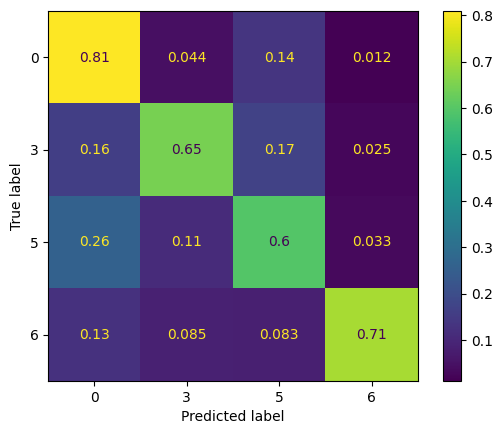

In [21]:
sub_cm = sub_cm / sub_cm.sum(axis=1, keepdims=True)

disp = ConfusionMatrixDisplay(confusion_matrix=sub_cm,
                              display_labels=[0,3,5,6])

disp.plot();

I want to investigate if there are words that are very frequent in these categories

In [51]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re

def basic_analyzer(text):
    text = text.lower()
    tokens = re.findall(r"[a-z]{3,}", text)  # solo parole >=3 lettere
    return [t for t in tokens if t not in ENGLISH_STOP_WORDS]

def generate_basic_wordcloud(text, cl):
    tokens = basic_analyzer(text)
    cloud = WordCloud(
        width=400,
        height=330,
        max_words=20,
        colormap="tab20c",
        collocations=False,
        background_color="white"
    ).generate(" ".join(tokens))

    plt.figure(figsize=(10, 8))
    plt.imshow(cloud)
    plt.title(f'Class: {cl}')
    plt.axis("off")
    plt.show()
    return cloud.words_


In [ ]:
from src.preprocessing import *
from src.config import *
from src.utils import *

news_df = load_data(DEVELOPMENT_PATH)

In [ ]:
full_str = news_df.groupby('y')['article'].sum()


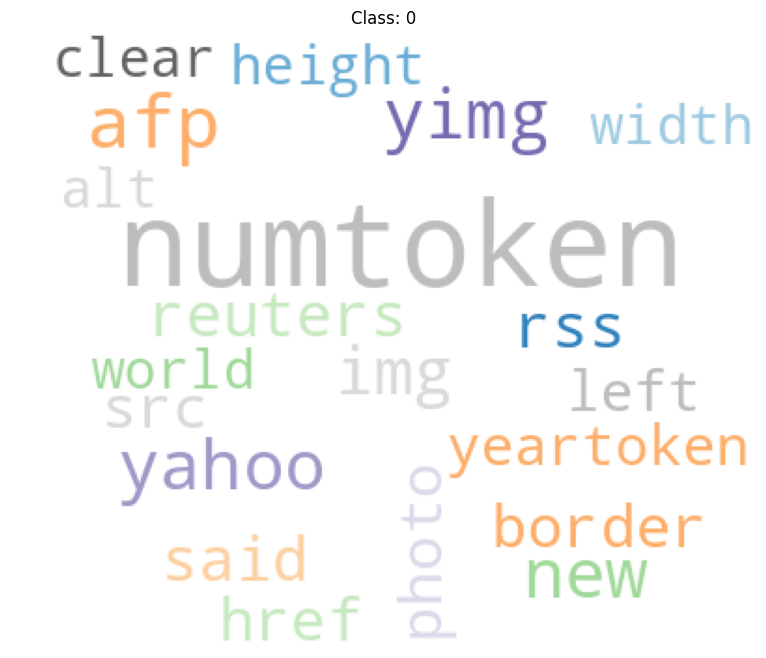

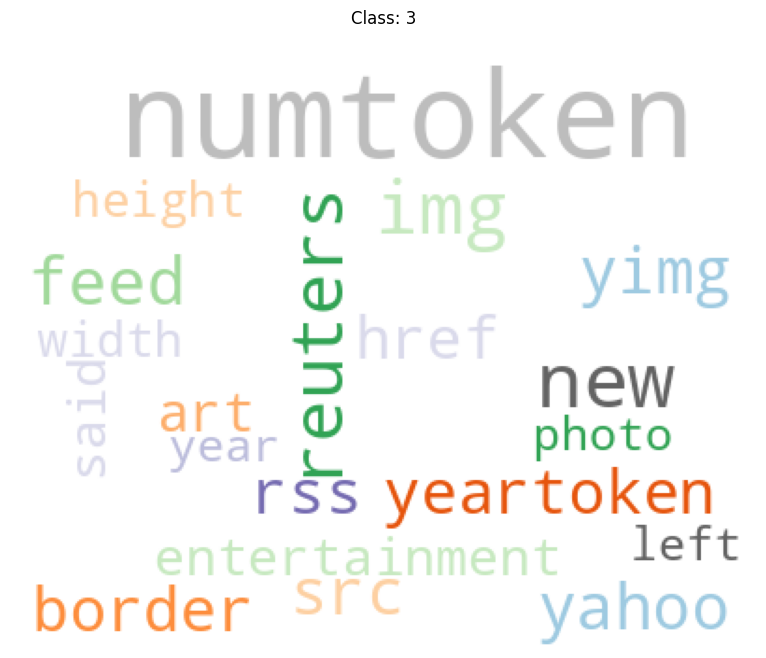

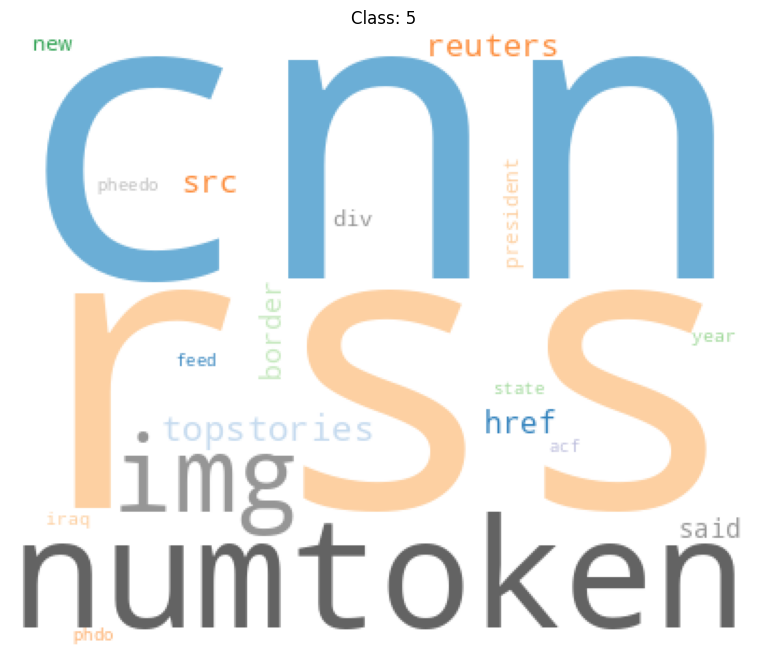

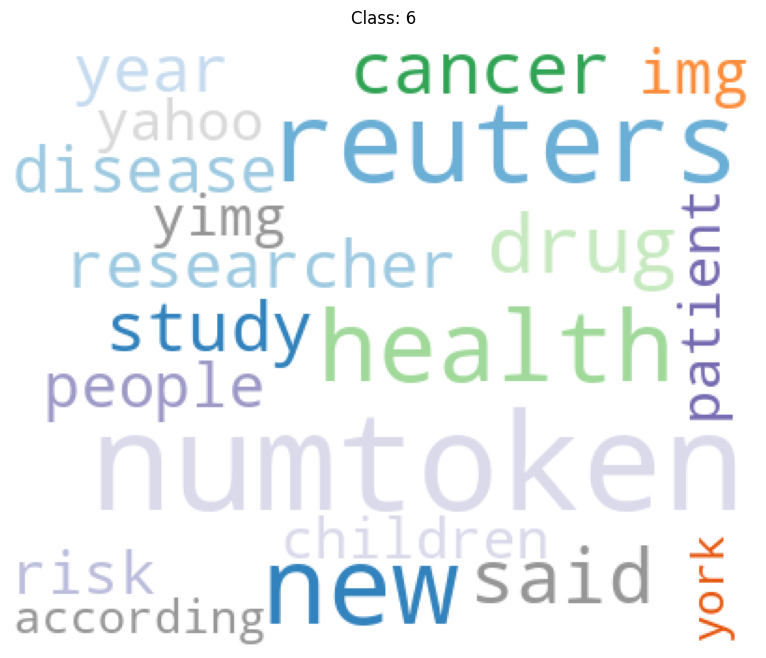

In [52]:
words = {}
for cl in [0, 3, 5, 6]:
    out = generate_basic_wordcloud(full_str[cl], cl)
    words[cl] = out


In [53]:
words

{0: {'numtoken': 1.0,
  'afp': 0.2765472724971523,
  'yahoo': 0.2373750158207822,
  'yimg': 0.23680546766232122,
  'new': 0.2313631185925832,
  'img': 0.20715732185799265,
  'said': 0.18801417542083282,
  'rss': 0.1845336033413492,
  'reuters': 0.18326794076699152,
  'src': 0.17168712821161877,
  'photo': 0.16985191747880016,
  'border': 0.16719402607264902,
  'href': 0.16244779141880775,
  'yeartoken': 0.14295658777369954,
  'left': 0.1386216934565245,
  'height': 0.12764207062397165,
  'width': 0.1270092393367928,
  'clear': 0.1260916339703835,
  'world': 0.12270598658397672,
  'alt': 0.12045943551449184},
 3: {'numtoken': 1.0,
  'new': 0.285674702133555,
  'img': 0.2727440657615221,
  'reuters': 0.2503001754872079,
  'feed': 0.209106862473446,
  'src': 0.19534497090606817,
  'yahoo': 0.19128105661771497,
  'yimg': 0.18878729103168007,
  'yeartoken': 0.180567100766602,
  'rss': 0.1801052923247437,
  'border': 0.1801052923247437,
  'href': 0.16865244296665743,
  'art': 0.1416828299621

In [54]:
from collections import Counter

counts_by_class = {}

for y, text in full_str.items():
    tokens = basic_analyzer(text)
    counts_by_class[y] = Counter(tokens)

In [56]:
def lexical_overlap(c1, c2):
    V1 = set(c1.keys())
    V2 = set(c2.keys())
    inter = V1 & V2
    union = V1 | V2
    return {
        "jaccard": len(inter) / len(union),
        "shared_words": len(inter),
        "vocab_1": len(V1),
        "vocab_2": len(V2),
    }


In [57]:
def weighted_overlap(c1, c2):
    shared = set(c1) & set(c2)
    num = sum(min(c1[w], c2[w]) for w in shared)
    den = sum(c1.values()) + sum(c2.values())
    return num / den
confused_classes = [0, 3, 5, 6]
import pandas as pd
from itertools import combinations

rows = []

for i, j in combinations(confused_classes, 2):
    c1 = counts_by_class[i]
    c2 = counts_by_class[j]

    overlap = lexical_overlap(c1, c2)
    w_overlap = weighted_overlap(c1, c2)

    rows.append({
        "class_1": i,
        "class_2": j,
        "jaccard_vocab": overlap["jaccard"],
        "shared_words": overlap["shared_words"],
        "weighted_overlap": w_overlap,
    })

overlap_df = pd.DataFrame(rows).sort_values("weighted_overlap", ascending=False)
overlap_df


,class_1,class_2,jaccard_vocab,shared_words,weighted_overlap
3,3,5,0.351864,12659,0.300927
1,0,5,0.291446,15124,0.216913
0,0,3,0.284154,16207,0.215457
5,5,6,0.262250,6535,0.145349
4,3,6,0.221948,6844,0.141339
2,0,6,0.159051,7693,0.067475


In [61]:
def top_shared_words(c1, c2, k=20):
    shared = set(c1) & set(c2)
    return sorted(
        [(w, min(c1[w], c2[w])) for w in shared],
        key=lambda x: x[1],
        reverse=True
    )[:k]
top_shared_words(counts_by_class[0], counts_by_class[5], k=15)


[('numtoken', 7132),
 ('rss', 5832),
 ('com', 5770),
 ('http', 5729),
 ('img', 5335),
 ('reuters', 3253),
 ('src', 3098),
 ('href', 2629),
 ('border', 2293),
 ('said', 1839),
 ('new', 1177),
 ('president', 1102),
 ('iraq', 917),
 ('feeds', 732),
 ('washington', 704)]

In [69]:
top_shared_words(counts_by_class[3], counts_by_class[5], k=15)

[('numtoken', 7132),
 ('com', 5770),
 ('http', 4967),
 ('img', 2953),
 ('reuters', 2710),
 ('src', 2115),
 ('rss', 1950),
 ('border', 1935),
 ('href', 1826),
 ('said', 1402),
 ('new', 1177),
 ('feeds', 732),
 ('people', 695),
 ('tuesday', 623),
 ('year', 592)]